<a href="https://colab.research.google.com/github/VidyaValsalan/Prediction-with-DeepLearning/blob/master/LSTM-RL-Prediction/Digwadih/Digwadih_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
from google.colab import files

In [60]:
uploaded = files.upload()

Saving Digwadih-data.csv to Digwadih-data (1).csv


In [61]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Digwadih-data.csv" with length 1082 bytes


In [62]:
import io
df1 = pd.read_csv(io.StringIO(uploaded['Digwadih-data.csv'].decode('utf-8')),names=['date','Digwadih'])
df1.head(5)
#a=input('enter the location')

,date,Digwadih
0,20161003,0.0
1,20161015,-1.0
2,20161027,-2.8
3,20161108,-7.5
4,20161120,-10.3


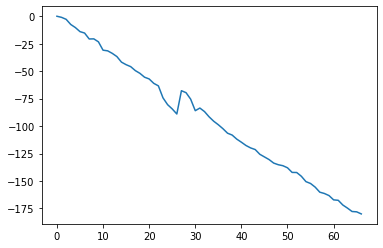

In [63]:
df1=df1.reset_index()['Digwadih']
df1.plot()
d=df1

In [64]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [65]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [66]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [67]:
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [68]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [70]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 4, 50)             10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 4, 50)             20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=800,batch_size=64,verbose=1)

Epoch 1/800
1/1 [==============================] - 0s 44ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 2/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 3/800
1/1 [==============================] - 0s 23ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 4/800
1/1 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 5/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 6/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 7/800
1/1 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 8/800
1/1 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 9/800
1/1 [==============================] - 0s 18ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 10/800
1/1 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 11/800
1/1 [=

In [90]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [91]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.027981729538643876

In [92]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.007882408591861767

In [93]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

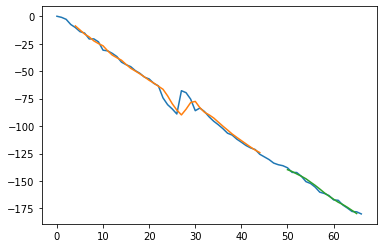

In [95]:
# Plotting 
import matplotlib.pyplot as plt
look_back=4
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [96]:
len(test_data)

21

In [97]:
x_input=test_data[17:].reshape(1,-1)
x_input.shape

(1, 4)

In [98]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [99]:
#prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=4
i=0
while(i<10):
    
    if(len(temp_input)>4):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[-0.02548702]
5
1 day input [ 0.01222222  0.01055556  0.         -0.02548702]
1 day output [[-0.03752317]]
2 day input [ 0.01055556  0.         -0.02548702 -0.03752317]
2 day output [[-0.05052544]]
3 day input [ 0.         -0.02548702 -0.03752317 -0.05052544]
3 day output [[-0.06673446]]
4 day input [-0.02548702 -0.03752317 -0.05052544 -0.06673446]
4 day output [[-0.08321583]]
5 day input [-0.03752317 -0.05052544 -0.06673446 -0.08321583]
5 day output [[-0.09743094]]
6 day input [-0.05052544 -0.06673446 -0.08321583 -0.09743094]
6 day output [[-0.11260567]]
7 day input [-0.06673446 -0.08321583 -0.09743094 -0.11260567]
7 day output [[-0.12818325]]
8 day input [-0.08321583 -0.09743094 -0.11260567 -0.12818325]
8 day output [[-0.14336433]]
9 day input [-0.09743094 -0.11260567 -0.12818325 -0.14336433]
9 day output [[-0.15822572]]
[[-0.025487016886472702], [-0.037523165345191956], [-0.05052543804049492], [-0.06673445552587509], [-0.08321583271026611], [-0.09743094444274902], [-0.11260566860437

In [100]:
day_new=np.arange(1,5)
day_pred=np.arange(5,15)

In [101]:
import matplotlib.pyplot as plt
len(df1)

67

In [52]:
#plt.plot(day_new,scaler.inverse_transform(df1[63:]))
#plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [102]:
df3=df1.tolist()
df3.extend(lst_output)

In [103]:
df3=scaler.inverse_transform(df3).tolist()

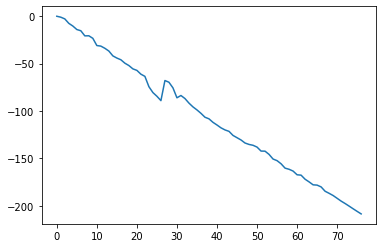

In [106]:
plt.plot(df3)

In [113]:
df3[67:77]

[[-184.5876630395651],
 [-186.75416976213455],
 [-189.09457884728909],
 [-192.01220199465752],
 [-194.9788498878479],
 [-197.53756999969482],
 [-200.2690203487873],
 [-203.0729842185974],
 [-205.80557852983475],
 [-208.48062872886658]]